# File and libraries

In [5]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_5_scaler_input'


file_tag = "df_merch_feat_eng_input"

# DSLabs functions

In [6]:
%run "scripts/dslabs_functions.py"


# Data functions

In [7]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [8]:
# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False


if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # sample
    data=data.sample(frac=0.05, replace=False)
    test=test.sample(frac=0.05, replace=False)
    train=train.sample(frac=0.05, replace=False)
    
    # create sample df version of test/train for variance studies
    test_sample= test
    train_sample= train
    
else:
    data=pd.read_csv(f"{filepath}.csv")

    
    test= pd.read_csv(f"{filepath}_test.csv")
    train= pd.read_csv(f"{filepath}_train.csv")

    # create sample for variance studies
    test_sample= test.sample(frac=0.05, replace=False)
    train_sample= train.sample(frac=0.5, replace=False)



 
target='returning_user'
vars: list[str] = data.columns.to_list()


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743351 entries, 0 to 743350
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       743351 non-null  float64
 1   device_category                  743351 non-null  float64
 2   device_mobile_brand_name         743351 non-null  float64
 3   device_mobile_model_name         743351 non-null  float64
 4   device_operating_system          743351 non-null  float64
 5   device_operating_system_version  743351 non-null  float64
 6   device_language                  743351 non-null  float64
 7   device_web_info_browser          743351 non-null  float64
 8   device_web_info_browser_version  743351 non-null  float64
 9   geo_region                       743351 non-null  float64
 10  geo_city                         743351 non-null  float64
 11  traffic_source_medium            743351 non-null  float64
 12  traffic

In [9]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (520345, 42)
Test shape: (223006, 42)


# Feat 1 - Dropping Low Variance Variables

## Feat 1 - Study Low Variance Variables and Threshold

using sampled dataframe due to heavy processing

### recall

Testing threshold: 0.003
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.003: {'accuracy': [0.5220627802690583, 0.6576681614349775], 'recall': [0.7200452147701583, 0.25470987189148453], 'precision': [0.29413575496382943, 0.2687872763419483], 'auc': [0.5901308936374332, 0.5191275348157987], 'f1': [0.4176592722106874, 0.2615592958018959]}
Evaluation for recall: [0.7200452147701583, 0.25470987189148453]
Testing threshold: 0.006
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.006: {'accuracy': [0.5220627802690583, 0.6576681614349775], 'recall': [0.7200452147701583, 0.25470987189148453], 'precision': [0.29413575496382943, 0.2687872763419483], 'auc': [0.5901308936374332, 0.5191275348157987], 'f1': [0.4176592722106874, 0.2615592958018959]}
Evaluation for recall: [0.7200452147701583, 0.25470987189148453]
Testing threshold: 0.009
Dropping variables: ['year', 'quarter']
Remaini

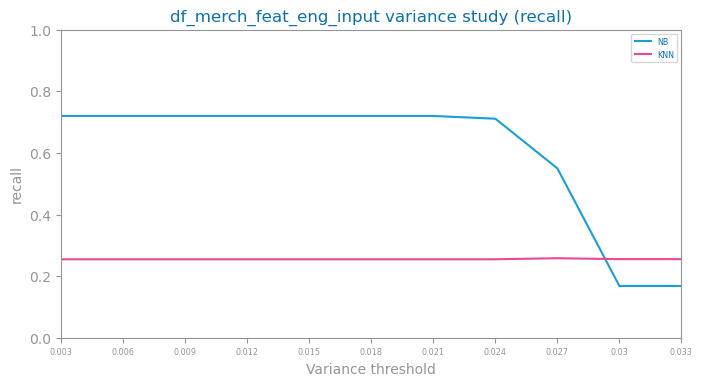

In [10]:
# modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)
if evaluate==True:

    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.033,
        lag=0.003,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

### accuracy study

Testing threshold: 0.003
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.003: {'accuracy': [0.7618834080717489, 0.6813452914798206], 'recall': [0.0, 0.2079879427279578], 'precision': [0.0, 0.27558662006989515], 'auc': [0.4999411487758945, 0.5186008451869544], 'f1': [0.0, 0.23706248657934292]}
Evaluation for accuracy: [0.7618834080717489, 0.6813452914798206]
Testing threshold: 0.006
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.006: {'accuracy': [0.7618834080717489, 0.6813452914798206], 'recall': [0.0, 0.2079879427279578], 'precision': [0.0, 0.27558662006989515], 'auc': [0.4999411487758945, 0.5186008451869544], 'f1': [0.0, 0.23706248657934292]}
Evaluation for accuracy: [0.7618834080717489, 0.6813452914798206]
Testing threshold: 0.009
Dropping variables: ['year', 'quarter']
Remaining features after drop: 40
Evaluation results at threshold 0.009: {'accuracy': [0.761883

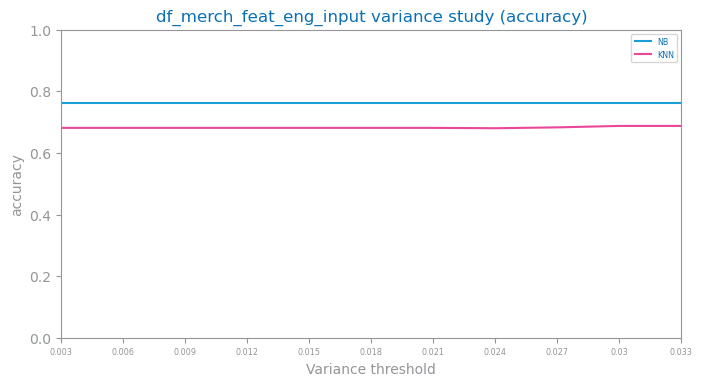

In [11]:
if evaluate==True:

    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_variance_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        max_threshold=0.033,
        lag=0.003,
        metric=eval_metric,
        file_tag=file_tag,
        min_features_to_keep = 10  # Minimum features safeguard

    )
    show()

## Feat 1 strategy Application

In [12]:
from pandas import DataFrame, Index

def apply_strategy_1(df: DataFrame) -> DataFrame:

    # this script is available in data_functions originally from DSLabs site in Feature Selection chapter

    df_copy=df.copy()
    
    vars2drop: list[str] = select_low_variance_variables(df_copy, max_threshold=0.024, min_features_to_keep=10, target=target)
    
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)

    return df_vars_drop


data_1=apply_strategy_1(data)

data_1.describe()


Variance threshold: 0.024, Remaining features: 40
Variables to drop: ['event_name', 'device_mobile_brand_name']
columns to drop: ['event_name', 'device_mobile_brand_name']
Remaining columns: Index(['device_category', 'device_mobile_model_name',
       'device_operating_system', 'device_operating_system_version',
       'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'month', 'day_of_year', 'week_number',
       'page_path_level_1', 'page_path_level_2', 'page_path_level_3',
       'path_length', 'time_of_day_sin', 'time_of_day_cos', 'local_hour_sin',
       'local_hour_cos', 'local_minute_sin', 'local_minute_cos',
       'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'day_sin',
       'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_eng

,device_category,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,geo_city,traffic_source_medium,...,day_of_week_nr_cos,week_of_month_nr_sin,week_of_month_nr_cos,geo_country,session_engaged,year,quarter,is_weekend,domain,returning_user
count,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,...,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000,743351.000000
mean,0.405756,0.548265,0.618932,0.456617,0.849813,0.547918,0.395678,0.461666,0.414000,0.532653,...,0.542604,0.479427,0.353487,0.145463,0.915526,0.261844,0.261844,0.198207,0.965614,0.258154
std,0.485571,0.158116,0.264085,0.242295,0.193411,0.160032,0.161979,0.271285,0.227126,0.288275,...,0.372604,0.425035,0.304509,0.352567,0.278098,0.439638,0.439638,0.398649,0.182219,0.437619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.421053,0.333333,0.200000,0.849813,0.500000,0.272727,0.243414,0.189702,0.250000,...,0.250000,0.000000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.526316,0.666667,0.456617,0.849813,0.500000,0.363636,0.557849,0.470190,0.500000,...,0.750000,0.500000,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.631579,0.833333,0.500000,1.000000,0.750000,0.395678,0.675089,0.617886,0.750000,...,1.000000,1.000000,0.750000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feat 1 train/test split 

Labels=[0.0, 1.0]


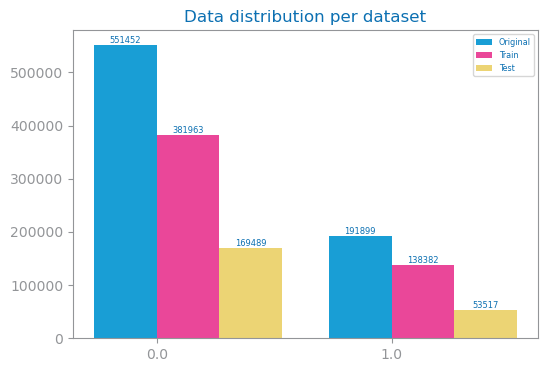

In [13]:
if evaluate==True:

    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart


    # Call the function to split the data
    from numpy import array, ndarray


    y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)



    train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

    # Distribution check
    values["Train"] = [
        len(train_1[train_1[target] == 0]),
        len(train_1[train_1[target] == 1]),
    ]
    values["Test"] = [
        len(test_1[test_1[target] == 0]),
        len(test_1[test_1[target] == 1]),
    ]

    # Visualize the distribution
    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")
    show()

## Feat 1 evaluate

In [30]:
if evaluate==True:

    # evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
    # removed Multinomial from run_NB function because dataset has negative values

    figure()
    eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_approach_1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_1_evaluation.png")
    show()

# Feat 2 - Dropping Redundant Variables


## Feat 2 - Study redundant variables and threshold

In [31]:
test.columns

Index(['event_name', 'device_category', 'device_mobile_brand_name',
       'device_mobile_model_name', 'device_operating_system',
       'device_operating_system_version', 'device_language',
       'device_web_info_browser', 'device_web_info_browser_version',
       'geo_region', 'geo_city', 'traffic_source_medium',
       'traffic_source_source', 'engagement_time_msec', 'month', 'day_of_year',
       'week_number', 'page_path_level_1', 'page_path_level_2',
       'page_path_level_3', 'path_length', 'time_of_day_sin',
       'time_of_day_cos', 'local_hour_sin', 'local_hour_cos',
       'local_minute_sin', 'local_minute_cos', 'hour_minute_fraction_sin',
       'hour_minute_fraction_cos', 'day_sin', 'day_cos', 'day_of_week_nr_sin',
       'day_of_week_nr_cos', 'week_of_month_nr_sin', 'week_of_month_nr_cos',
       'geo_country', 'session_engaged', 'year', 'quarter', 'is_weekend',
       'domain', 'returning_user'],
      dtype='object')

In [32]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "recall"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

In [33]:
if evaluate==True:

    # modified study_variance_for_feature_selection() in dslabs functions to keep minimum variables and print metrics (due to error)


    eval_metric = "accuracy"
    figure(figsize=(2 * HEIGHT, HEIGHT))
    study_redundancy_for_feature_selection(
        train_sample,
        test_sample,
        target=target,
        min_threshold = 0.001,
        lag = 0.2,
        metric=eval_metric,
        file_tag=file_tag,
    )
    show()

## Feat 2 strategy aplication

In [34]:
from pandas import DataFrame, Series
from sklearn.preprocessing import MinMaxScaler

def apply_strategy_2(df):

    df_copy=df.copy()

    vars2drop = select_redundant_variables(df_copy, min_threshold=0.4, target=target)
    print("columns to drop:", vars2drop)

    df_vars_drop = df_copy.drop(columns=vars2drop, errors='ignore')
    
    print("Remaining columns:", df_vars_drop.columns)


    return df_vars_drop


data_2=data.copy()

data_2=apply_strategy_2(data_2)


columns to drop: ['device_mobile_brand_name', 'device_mobile_model_name', 'device_operating_system', 'device_operating_system_version', 'device_category', 'day_of_year', 'week_number', 'year', 'quarter', 'month', 'page_path_level_2', 'page_path_level_3', 'path_length', 'page_path_level_1', 'local_hour_sin', 'local_hour_cos', 'hour_minute_fraction_sin', 'hour_minute_fraction_cos', 'time_of_day_sin', 'time_of_day_cos']
Remaining columns: Index(['event_name', 'device_language', 'device_web_info_browser',
       'device_web_info_browser_version', 'geo_region', 'geo_city',
       'traffic_source_medium', 'traffic_source_source',
       'engagement_time_msec', 'local_minute_sin', 'local_minute_cos',
       'day_sin', 'day_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_nr_sin', 'week_of_month_nr_cos', 'geo_country',
       'session_engaged', 'is_weekend', 'domain', 'returning_user'],
      dtype='object')


## Feat 2 train/test split 

In [35]:
if evaluate ==True:
    from pandas import concat
    from matplotlib.pyplot import figure, show
    from sklearn.model_selection import train_test_split
    from dslabs_functions import plot_multibar_chart

    # train/test split from DSLABS Classification/Evaluation Chapter
    # created split_data_save_csv on data_functions

    # Call the function to split the data

    y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


    train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


    values["Train"] = [
        len(train_2[train_2[target] == 0]),
        len(train_2[train_2[target] == 1]),
    ]
    values["Test"] = [
        len(test_2[test_2[target] == 0]),
        len(test_2[test_2[target] == 1]),
    ]

    figure(figsize=(6, 4))
    plot_multibar_chart(labels, values, title="Data distribution per dataset")

## Feat 2 evaluate

In [36]:
if evaluate == True:
    figure()
    eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='returning_user', metric="recall")
    plot_multibar_chart(
        ["NB", "KNN"], eval_2, title=f"{file_tag}_approach_2_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_approach_2_evaluation.png")
    show()

# Approach uplift comparison

## uplift df

In [37]:
if evaluate == True:
    
    algorithms = ['Naive Bayes', 'KNN']

    # Create DataFrames for eval_1 and eval_2
    df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
    df_eval_2 = pd.DataFrame(eval_2, index=algorithms)

    # Calculate uplift
    df_uplift = df_eval_2 - df_eval_1



    # Combine everything into one DataFrame (without misalignment issues)
    comparison_df = pd.concat([df_eval_1, df_eval_2, df_uplift], axis=1)
    comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 2', 'Uplift'], eval_1.keys()])



    # Display the DataFrame
    display(comparison_df)

# Analysis




# save to csv

In [ ]:
if test_data==False:
    
    
    data_save=data.copy()

    data_save=apply_strategy_1(data_save)
        
    data_save.to_csv(f"data/df_merch_6_feat_eng_input.csv", index=False)


    print(data_save.columns)



## train test csv

In [ ]:
if test_data==False:
    

    # data_save_copy=data_save.copy() 
    # y, X, labels, class_counts = define_target_and_prepare_data(data_save_copy, target=target)
    # train, test = split_data_save_csv(pd.DataFrame(X, columns=data_save_copy.columns), y, data_columns=data_save_copy.columns, target_column=target)  

    
    train,test=simple_split_df(data_save,sort_by='day_of_year')
    
    train.to_csv(f"data/df_merch_6_feat_eng_input_train.csv", index=False)
    print(train.columns)
    
    test.to_csv(f"data/df_merch_6_feat_eng_input_test.csv", index=False)
    print(test.columns)